# 环境配置
## 环境管理与包安装
其中 mamba == conda 两者接口一致，但 mamba 比 conda 更快，建议使用 mamba 管理环境安装依赖可以从 [https://conda-forge.org/miniforge/](https://conda-forge.org/miniforge/) 下载安装（建议使用 Miniforge）。

## 依赖库
```shell
mamba create -n metgrs python==3.11 numpy pandas xarray matplotlib joblib python-dateutil cartopy -c conda-forge -y
```

## jupyter lab 运行环境安装

```shell
mamba create -n runtime python==3.11 jupyterlab jupyterlab-lsp python-lsp-server jupyterlab-language-pack-zh-cn jupyterlab-git nb_conda -c conda-forge -y
```
## 开发环境安装

```shell
mamba create -n devmetgrs python==3.11 numpy xarray pandas geopandas scipy dask metpy matplotlib cartopy cnmaps sympy  nb_conda scikit-learn pytest pytest-cov pytest-xdist flake8 black pre-commit build twine -c conda-forge -y
```

# 中文绘图配置
## 示例
![](./Images/缺失中文字体绘图示例.png)
## 基础包安装

cartopy 地理边界与中文字体包
```bash
conda install cartopy_offlinedata -c conda-forge -y
```

## 临时设置中文字体

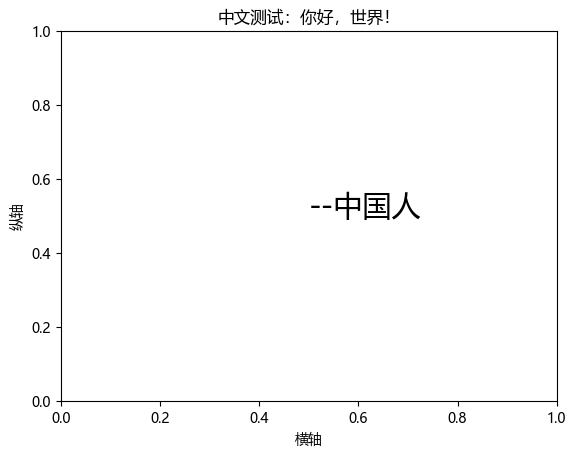

In [2]:
# -*- coding: utf-8 -*-
"""
让 Matplotlib 立即使用 Conda 安装的 Noto Sans CJK （Windows/Linux/macOS 通用）
"""
import os
import matplotlib
import matplotlib.font_manager as fm
from pathlib import Path

# 1. 定位 Conda 环境的 fonts 目录
conda_prefix = Path(os.environ.get("CONDA_PREFIX", ""))
if not conda_prefix:
    raise RuntimeError("请激活 Conda 环境后再运行！")

# Windows 与 Unix 路径差异
if os.name == "nt":          # Windows
    fonts_dir = conda_prefix / "fonts"
else:                        # Linux/macOS
    fonts_dir = conda_prefix / "share" / "fonts"

# 2. 找到 Noto CJK 字体文件（支持 .ttf/.ttc/.otf）
noto_files = []
for ext in ("*.ttf", "*.ttc", "*.otf"):
    noto_files.extend(fonts_dir.glob(ext))

noto_files = [f for f in noto_files if "noto" in f.name.lower() and "cjk" in f.name.lower()]
if not noto_files:
    raise FileNotFoundError(f"在 {fonts_dir} 下找不到 Noto CJK 字体！")

# 3. 注册到 Matplotlib（只需执行一次）
for fp in noto_files:
    fm.fontManager.addfont(str(fp))

# 4. 设置默认中文字体（用 SC，也可改成 JP/KR）
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 与系统注册名保持一致
matplotlib.rcParams['axes.unicode_minus'] = False              # 修复负号

# 5. 验证
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("中文测试：你好，世界！")
ax.set_xlabel("横轴")
ax.set_ylabel("纵轴")
ax.text(0.5,0.5,'--中国人',fontsize=21)
plt.show()

## windows永久设置中文字体

In [1]:
# -*- coding: utf-8 -*-
"""
就地修改当前环境里的 matplotlibrc （类似 sed -i）
实现 Linux 下的 sed 命令功能：
sed -i 's/DejaVu Serif,/Noto Sans CJK SC, DejaVu Serif,/g' matplotlibrc
sed -i 's/DejaVu Sans,/Noto Sans CJK SC, DejaVu Sans,/g' matplotlibrc
sed -i 's/Arial,//g' matplotlibrc
"""
import re
import shutil
from pathlib import Path
import matplotlib

# 1. 系统级模板文件路径
mpl_rc = Path(matplotlib.get_data_path()) / 'matplotlibrc'
print(f"配置文件路径: {mpl_rc}")
if not mpl_rc.exists():
    raise FileNotFoundError(f"找不到配置文件：{mpl_rc}")

# 2. 读入全文
text = mpl_rc.read_text(encoding='utf-8')

# 3. 优化：先移除已存在的 Noto Sans CJK SC 避免重复
text = re.sub(r'Microsoft YaHei,\s*', '', text, flags=re.IGNORECASE)

# 4. 正确实现 sed 替换（针对字体列表中的特定字符串）
# 替换 DejaVu Serif 为 Noto Sans CJK SC, DejaVu Serif
text = re.sub(r'(\bDejaVu Serif,\s*)', r'Microsoft YaHei, \1', text, flags=re.IGNORECASE)
# 替换 DejaVu Sans 为 Noto Sans CJK SC, DejaVu Sans
text = re.sub(r'(\bDejaVu Sans,\s*)', r'Microsoft YaHei, \1', text, flags=re.IGNORECASE)

# 5. 移除 Arial 字体（处理所有位置的 Arial,）
text = re.sub(r'Arial,\s*', '', text, flags=re.IGNORECASE)

# 6. 修复可能的多余逗号和空格
text = re.sub(r',\s*,', ',', text)
text = re.sub(r',\s+$', '', text)  # 移除行尾多余逗号

# 7. 写回（先备份）
bak = mpl_rc.with_suffix('.bak')
if not bak.exists():               # 只备份一次
    shutil.copy2(mpl_rc, bak)
mpl_rc.write_text(text, encoding='utf-8')

print("已就地修改：", mpl_rc)
print("备份文件：", bak)

# 验证修改结果
print("\n修改后的字体配置:")
lines = text.split('\n')
font_lines = [line for line in lines if 'font.' in line.lower() and ':' in line]
for line in font_lines[:5]:  # 显示前5行字体相关配置
    print(line)

配置文件路径: D:\Programs\miniforge3\envs\qxfx3p11\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
已就地修改： D:\Programs\miniforge3\envs\qxfx3p11\Lib\site-packages\matplotlib\mpl-data\matplotlibrc
备份文件： D:\Programs\miniforge3\envs\qxfx3p11\Lib\site-packages\matplotlib\mpl-data\matplotlibrc.bak

修改后的字体配置:
## The font.style property has three values: normal (or roman), italic
## The font.variant property has two values: normal or small-caps.  For
## The font.weight property has effectively 13 values: normal, bold,
## The font.stretch property has 11 values: ultra-condensed,
## relative to font.size, using the following values: xx-small, x-small,


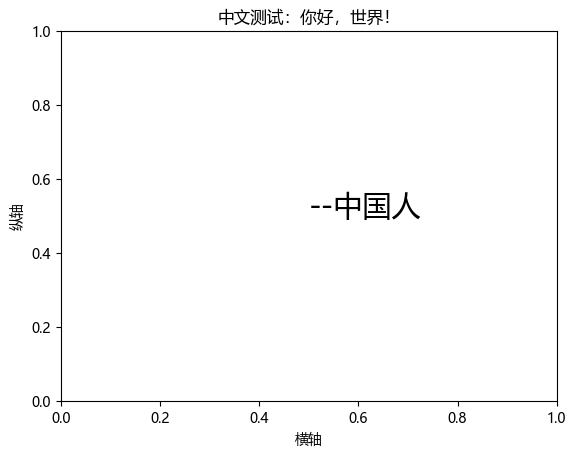

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("中文测试：你好，世界！")
ax.set_xlabel("横轴")
ax.set_ylabel("纵轴")
ax.text(0.5,0.5,'--中国人',fontsize=21)
plt.show()

## Linux 下永久配置中文字体
```bash
conda install  font-ttf-noto-cjk -c conda-forge -y
pip install mplfonts
mplfonts init
# 注意qxfx是您配置的环境名称，python3.11 是您环境的python版本，这两个文件夹需要您手动修改
sed -i 's/DejaVu Serif,/Noto Sans CJK SC, DejaVu Serif,/g' /opt/conda/envs/qxfx/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
sed -i 's/DejaVu Sans,/Noto Sans CJK SC, DejaVu Sans,/g' /opt/conda/envs/qxfx/lib/python3.11/site-packages/matplotlib//mpl-data/matplotlibrc
sed -i 's/Arial,//g' /opt/conda/envs/qxfx/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc
rm -f -r ~/.cache/matplotlib
```

# jupyter 如何添加环境

## 方法一

```
conda install nb_conda -c conda-forge -y
```

## 方法二
```
python -m ipykernel install --user --name qxfx --display-name "Python (qxfx)"
```